<a href="https://colab.research.google.com/github/j23-cs167/project-2-nickwharff/blob/main/Project2_wharff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name: Nick Wharff

Proposed Points (out of 25): 22 ! 

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

I downloaded a mushroom dataset from kaggle: [link here](https://www.kaggle.com/datasets/uciml/mushroom-classification). I will be testing tdifferent models on this dataset in order to determine if you can accurately predict whether or not a mushroom is poisionous from its physical traits. I will be using an accuracy metric to determine how well my models are doing.

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

- started by checking if there was any missing data, of which there is none.
- then split data into test/train
- didn't normalize as all data values are strings
- however, did create dummy variables for all columns except target

In [1]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# load and prepare your data here
path = '/content/drive/MyDrive/CS167/datasets/mushrooms.csv'

shroom = pd.read_csv(path)
shroom.columns

shroom.isna().any() # No missing data

shroom.shape


(8124, 23)

In [15]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder

import numpy

target = 'class'
predictors = shroom.columns.drop(target)



# predictors

shroom_dum = pd.get_dummies(shroom, columns = predictors)

shroom_dum.head()


,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,e,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,e,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,p,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,e,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

target = 'class'
predictors = shroom_dum.columns.drop(target)

train_data, test_data, train_sln, test_sln = \
        train_test_split(shroom_dum[predictors], shroom_dum[target], test_size = 0.2, random_state=41)

train_data.shape

train_data.head()


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
3144,0,0,1,0,0,0,0,0,0,1,...,0,0,1,1,0,0,0,0,0,0
5539,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4374,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3806,0,0,0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
8101,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [5]:
# Baseline

from sklearn.dummy import DummyClassifier
from sklearn import metrics


dummy = DummyClassifier()
dummy.fit(train_data, train_sln)

pre = dummy.predict(test_data)

print('Accuracy for dummy : ', metrics.accuracy_score(test_sln, pre))

Accuracy for dummy :  0.52


# 3. Research

Put your code and your experiments here.

In [ ]:
# KNN

from sklearn import neighbors

knn_accuracy = []

for i in range(1,6499,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_data,train_sln)
    predictions = knn.predict(test_data)
    current_acc = metrics.accuracy_score(predictions, test_sln)
    knn_accuracy.append(current_acc)





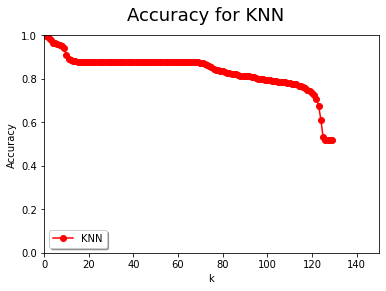

In [ ]:
import matplotlib.pyplot as plt

xvals = range(1,6499,50)
plt.suptitle('Accuracy for KNN',fontsize=18)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.plot(knn_accuracy,'ro-',label='KNN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,150,0,1])


plt.show()

# best with 3 NN

In [ ]:
# WKNN
wknn_accuracy = []

for i in range(1,6499,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors = i, weights = 'distance')
    knn.fit(train_data,train_sln)
    predictions2 = knn.predict(test_data)
    current_acc = metrics.accuracy_score(predictions2, test_sln)
    wknn_accuracy.append(current_acc)

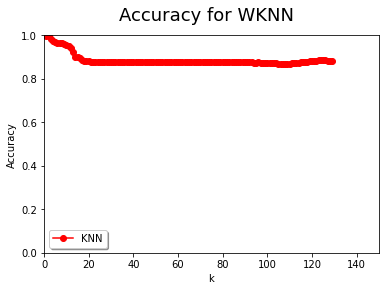

In [ ]:
# xvals = range(1,6499,50)
plt.suptitle('Accuracy for WKNN',fontsize=18)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.plot(wknn_accuracy,'ro-',label='KNN')
plt.legend(loc='lower left', shadow=True)
plt.axis([0,150,0,1])


plt.show()

# accurate at 2

Accuracy for this model was:  1.0


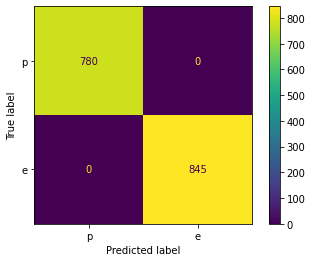

In [20]:
# SGD 

import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(train_data, train_sln)
sgd_pre = sgd.predict(test_data)

accuracy5 = metrics.accuracy_score(test_sln, sgd_pre)

print('Accuracy for this model was: ', accuracy5)
vals = shroom[target].unique() ## possible classification values (species)

conf_mat5 = metrics.confusion_matrix(test_sln, sgd_pre, labels=vals)


#display
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat5,display_labels=vals)
disp.plot()
plt.show()

In [16]:
# Random Forest

from sklearn import ensemble

rf_accuracy = []

for i in range(1,23):
    curr_rf = ensemble.RandomForestClassifier(n_estimators=i, random_state=31)
    curr_rf.fit(train_data,train_sln)
    curr_predictions = curr_rf.predict(test_data)
    curr_error = metrics.accuracy_score(test_sln,curr_predictions)
    rf_accuracy.append(curr_error)

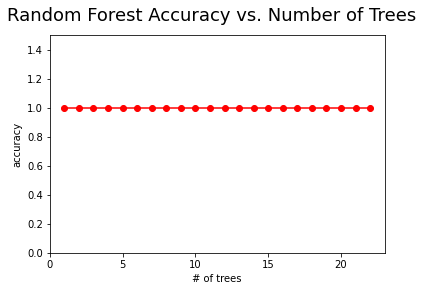

In [17]:
xvals = range(1,23)
plt.suptitle('Random Forest Accuracy vs. Number of Trees',fontsize=18)
plt.xlabel('# of trees')
plt.ylabel('accuracy')
plt.plot(xvals,rf_accuracy,'ro-')
plt.axis([0,23,0,1.5])

plt.show()

Accuracy: 1.0


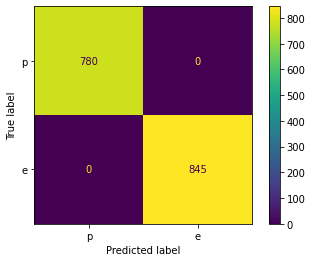

In [18]:
#Default Perceptron

from sklearn.linear_model import Perceptron

perc = Perceptron()
perc.fit(train_data, train_sln)
per_predictions = perc.predict(test_data)
accuracy3 = metrics.accuracy_score(per_predictions, test_sln)

print('Accuracy:', accuracy3)

conf_mat3 = metrics.confusion_matrix(test_sln, per_predictions, labels=vals)


#display
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat3,display_labels=vals)
disp.plot()
plt.show()

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

In [ ]:
# optimal KNN 

opt_knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
opt_knn.fit(train_data,train_sln)
predictions = opt_knn.predict(test_data)
print('Accuracy for this model was: ', metrics.accuracy_score(predictions,test_sln))

Accuracy for this model was:  1.0


In [ ]:
# optimal WKNN

opt_wknn = neighbors.KNeighborsClassifier(n_neighbors = 3)
opt_wknn.fit(train_data, train_sln)
wknn_pre = opt_wknn.predict(test_data)

print('Accuracy for this model was: ', metrics.accuracy_score(wknn_pre, test_sln))

Accuracy for this model was:  1.0


In [9]:
opt_sgd = SGDClassifier()
opt_sgd.fit(train_data, train_sln)
sgd_pre = opt_sgd.predict(test_data)

print('Accuracy for this model was: ', metrics.accuracy_score(sgd_pre, test_sln))

Accuracy for this model was:  1.0


/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [82] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[0.1693451  0.14041464]


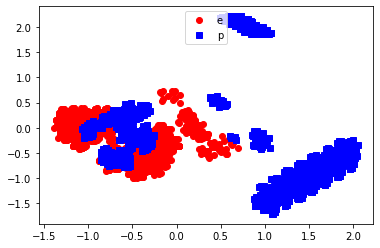

In [19]:
#PCA

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=2)
selector.fit(train_data,train_sln)
train_transformed = selector.transform(train_data)
test_transformed = selector.transform(test_data)


extractor = PCA(n_components=2, whiten=True)

extractor.fit(train_data)
print(extractor.explained_variance_ratio_)

train_transformed = extractor.transform(train_data)
test_transformed = extractor.transform(test_data)


#visualizing the new axes
#PCA gives it back as numpy array
tdf = pd.DataFrame(train_transformed)
#next line: probably not the best way
tdf['class'] = pd.Series(list(train_sln)) 


edible_series = tdf[ tdf['class'] == 'e' ]
poisonous_series = tdf[ tdf['class'] == 'p' ]

plt.plot(edible_series[0],edible_series[1],'ro',label='e')
plt.plot(poisonous_series[0],poisonous_series[1],'bs',label='p')
plt.legend(loc='upper center')
plt.show()

## Analysis Response

This was kind of boring! I was optimistic when I found the dataset, as exploring different mushrooms sounds fun. I had trouble finding a dataset that I wanted to work with, so I was glad when I found this one. However, after completing this project, I do not share the same feeling. I guess it makes sense based on the dataset, as if something shares the same characteristics as the mushroom that you are looking to classify, they will share the same class. However, I was not planning on every model being able to predict the class with an accuracy score of 100%. This made it kind of boring to explore different models. All of the models, even ones with default parameters, performed the same. This made it pointless to really tune the models, as I was unable to make any meaningful changes. The only ones that were able to be altered were the KNN and WKNN models.

When dissecting which model performed the best, it becomes difficult, as all the models performed the same when looking at accuracy scores. If suggesting a model to be used in a computer science setting, I would suggest K-Nearest Neighbors, as it is easy to implement, and computationally light. 

However, I think there are some real-world applications to this project as well. If anything, it proves that if you know what characteristics make a mushroom poisonous, you will be able to accurately decide whether or not a mushroom you come across is edible (this dataset originally came about due to the amount of people who foraged for wild mushrooms). In this sense, I think it makes sense to use a decision tree, as it mimics an individual's thought process. By studying this model, you can safely forage for mushrooms!

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

## Answer

I had a lot of trouble getting started on this project. I originally was going to explore a dataset of jeopardy questions, but there wasn't really a target variable to predict. After that I had trouble finding a dataset I was interested in until I found the mushrooms. With this dataset, I had the most trouble preparing the data. Due to the nature of the values (each one being a string), I had to create dummy variables that would allow my model to accurately predict the class. However, the largest problem I ran into was motivation. After the second model also predicting an accuracy of 100%, it was very discouraging, as the exciting project I thought I had began had become very predictable. However, I had already committed. Overall, I pushed through it and completed my project!